<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

# Install seaborn and matplotlib
# Install seaborn and matplotlib using the magic command
%pip install seaborn matplotlib




<ipython-input-1-f3c4546586bb>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch


async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

In [6]:
df.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<ipython-input-8-8143a1e12918>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ConvertedComp'].dropna(), shade=True, color='blue')


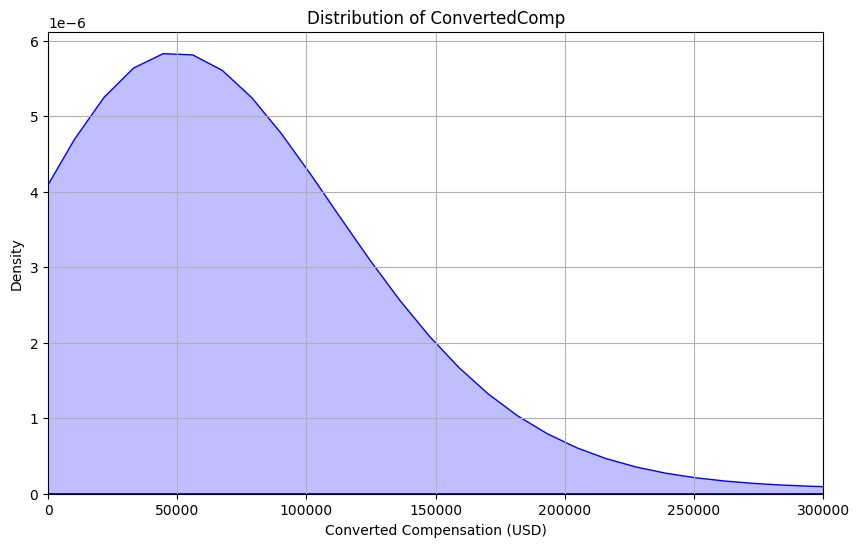

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove duplicate rows
df = df.drop_duplicates()

# Plot the distribution of ConvertedComp
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ConvertedComp'].dropna(), shade=True, color='blue')
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.xlim(0, 300000)  # Adjust x-axis limit for better visualization
plt.grid(True)

# Show the plot
plt.show()


Plot the histogram for the column `ConvertedComp`.


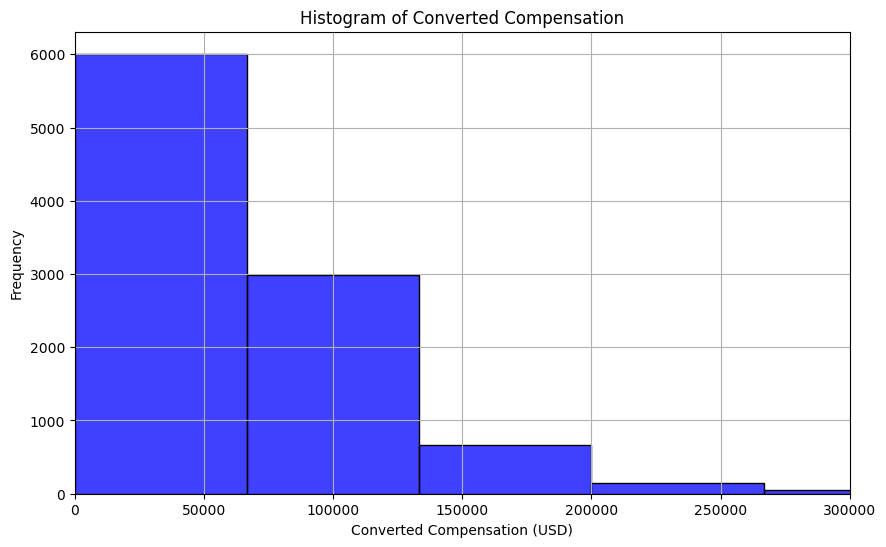

In [9]:


# Plot the histogram of ConvertedComp
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'].dropna(), bins=30, color='blue', kde=False)
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.xlim(0, 300000)  # Adjust x-axis limit for better visualization
plt.grid(True)

# Show the plot
plt.show()


What is the median of the column `ConvertedComp`?


In [10]:


# Calculate the median of ConvertedComp
median_converted_comp = df['ConvertedComp'].median()

# Print the median
print(f"The median of the ConvertedComp column is: {median_converted_comp}")


The median of the ConvertedComp column is: 57745.0


How many responders identified themselves only as a **Man**?


In [11]:

# Filter the DataFrame to include only respondents who identified as "Man"
man_responders_count = df[df['Gender'] == 'Man'].shape[0]

# Print the number of respondents who identified as "Man"
print(f"The number of respondents who identified themselves only as a Man is: {man_responders_count}")



The number of respondents who identified themselves only as a Man is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [12]:


# Filter the DataFrame to include only respondents who identified as "Woman"
woman_responders = df[df['Gender'] == 'Woman']

# Calculate the median of ConvertedComp for these respondents
median_converted_comp_woman = woman_responders['ConvertedComp'].median()

# Print the median ConvertedComp for respondents identified only as "Woman"
print(f"The median ConvertedComp for respondents identified only as a Woman is: {median_converted_comp_woman}")


The median ConvertedComp for respondents identified only as a Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [13]:


# Compute the five-number summary for the 'Age' column
five_number_summary = {
    'Minimum': df['Age'].min(),
    'Q1 (25th percentile)': df['Age'].quantile(0.25),
    'Median (50th percentile)': df['Age'].median(),
    'Q3 (75th percentile)': df['Age'].quantile(0.75),
    'Maximum': df['Age'].max()
}

# Print the five-number summary
print(five_number_summary)


{'Minimum': 16.0, 'Q1 (25th percentile)': 25.0, 'Median (50th percentile)': 29.0, 'Q3 (75th percentile)': 35.0, 'Maximum': 99.0}


Plot a histogram of the column `Age`.


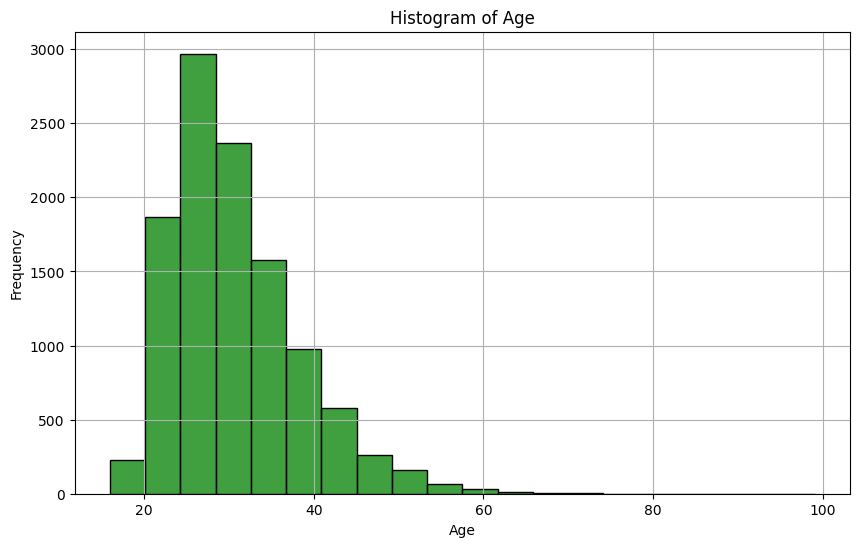

In [15]:

# Plot the histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=20, color='green', kde=False)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()



## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


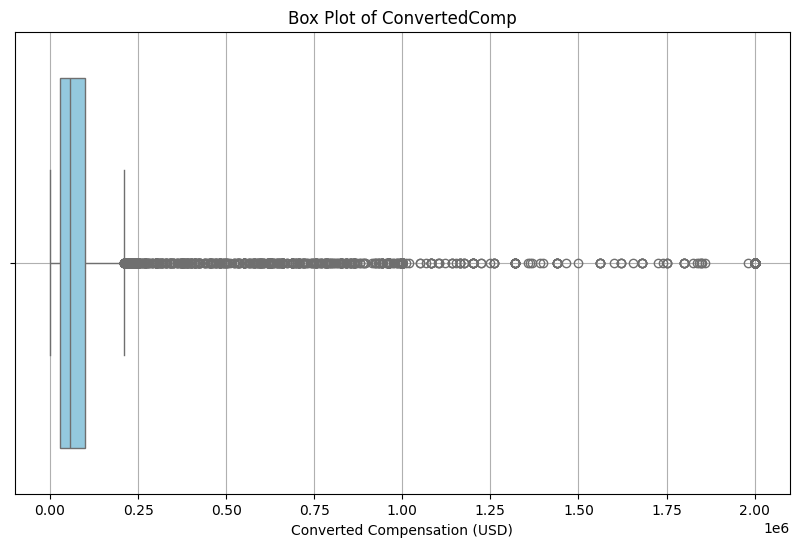

In [16]:


# Plot the box plot for ConvertedComp
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'].dropna(), color='skyblue')
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.grid(True)

# Show the plot
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [17]:

# Compute the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the IQR
print(f"The Interquartile Range (IQR) for the ConvertedComp column is: {IQR}")


The Interquartile Range (IQR) for the ConvertedComp column is: 73132.0


Find out the upper and lower bounds.


In [18]:


# Compute the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Compute the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the bounds
print(f"The lower bound for outliers is: {lower_bound}")
print(f"The upper bound for outliers is: {upper_bound}")


The lower bound for outliers is: -82830.0
The upper bound for outliers is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [19]:

# Compute the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Compute the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_below = df[df['ConvertedComp'] < lower_bound].shape[0]
outliers_above = df[df['ConvertedComp'] > upper_bound].shape[0]
total_outliers = outliers_below + outliers_above

# Print the number of outliers
print(f"Number of outliers below the lower bound: {outliers_below}")
print(f"Number of outliers above the upper bound: {outliers_above}")
print(f"Total number of outliers: {total_outliers}")


Number of outliers below the lower bound: 0
Number of outliers above the upper bound: 879
Total number of outliers: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [20]:


# Create a new DataFrame by filtering out the outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print the shape of the original and new DataFrame
print(f"Original DataFrame shape: {df.shape}")
print(f"New DataFrame shape (without outliers): {df_no_outliers.shape}")

# Optional: Save the new DataFrame to a CSV file
df_no_outliers.to_csv('survey_data_no_outliers.csv', index=False)


Original DataFrame shape: (11398, 85)
New DataFrame shape (without outliers): (9703, 85)


In [27]:


# Remove duplicate rows to ensure accurate calculations
df = df.drop_duplicates()

# Calculate the median of 'ConvertedComp' before removing outliers
median_converted_comp_before = df['ConvertedComp'].median()

# Print the median value
print(f"The median ConvertedComp before removing outliers is: {median_converted_comp_before}")


The median ConvertedComp before removing outliers is: 57745.0


In [26]:


# Compute the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Compute the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame by filtering out the outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the median of 'ConvertedComp' after removing outliers
median_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].median()

# Print the median value
print(f"The median ConvertedComp after removing outliers is: {median_converted_comp_no_outliers}")


The median ConvertedComp after removing outliers is: 52704.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [24]:

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Extract the correlation with the 'Age' column
if 'Age' in correlation_matrix.columns:
    age_correlation = correlation_matrix['Age']
else:
    age_correlation = pd.Series()  # Empty series if 'Age' is not present

# Print the correlation values for 'Age'
print(age_correlation)


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


In [25]:


# Calculate the median of the 'Age' column
median_age = df['Age'].median()

# Print the median age
print(f"The median age of survey respondents is: {median_age}")


The median age of survey respondents is: 29.0


In [28]:

# Compute the first quartile (Q1) for the 'Age' column
Q1 = df['Age'].quantile(0.25)

# Calculate the lower bound for outliers
lower_bound = Q1 - 1.5 * (df['Age'].quantile(0.75) - Q1)

# Count the number of outliers below Q1
outliers_below_Q1 = df[df['Age'] < lower_bound]

# Print the number of outliers below Q1
print(f"Number of outliers below Q1: {outliers_below_Q1.shape[0]}")


Number of outliers below Q1: 0


In [29]:

# Compute the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Compute the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame by filtering out the outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the mean of 'ConvertedComp' after removing outliers
mean_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].mean()

# Print the mean value
print(f"The mean ConvertedComp after removing outliers is: {mean_converted_comp_no_outliers}")


The mean ConvertedComp after removing outliers is: 59883.20838915799


In [30]:

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Extract the correlation with the 'Age' column
age_correlation = correlation_matrix['Age']

# Find columns with negative correlation with 'Age'
negative_correlation_columns = age_correlation[age_correlation < 0]

# Print the columns with negative correlation
print("Columns with negative correlation with 'Age':")
print(negative_correlation_columns)


Columns with negative correlation with 'Age':
CodeRevHrs   -0.020469
Name: Age, dtype: float64


In [31]:

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Extract the correlation with the 'Age' column
age_correlation = correlation_matrix['Age']

# Find the column with the highest correlation with 'Age'
highest_correlation_column = age_correlation.drop('Age').idxmax()
highest_correlation_value = age_correlation[highest_correlation_column]

# Print the result
print(f"The column with the highest correlation with 'Age' is '{highest_correlation_column}' with a correlation value of {highest_correlation_value}.")


The column with the highest correlation with 'Age' is 'ConvertedComp' with a correlation value of 0.10538616072629158.


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
